In [336]:
# STEP1: DATA LOADING

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
%matplotlib inline

In [337]:
# Reading the obesity data into a data frame
obesity_data = pd.read_csv('MSOA_Ward_LA_Obesity.csv' , header=[0,1,2,3])
obesity_data.head(10)

,Unnamed: 0_level_0,NCMP 2011/12 to 2013/14\nObesity and excess weight prevalence by school year and place of child residence,Unnamed: 2_level_0,Unnamed: 3_level_0,Unnamed: 4_level_0,Reception (age 4-5 years),Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0,Unnamed: 9_level_0,...,Unnamed: 19_level_0,Unnamed: 20_level_0,Unnamed: 21_level_0,Unnamed: 22_level_0,Year 6 (age 10-11),Unnamed: 24_level_0,Unnamed: 25_level_0,Unnamed: 26_level_0,Unnamed: 27_level_0,Unnamed: 28_level_0
,Unnamed: 0_level_1,Unnamed: 1_level_1,Unnamed: 2_level_1,Unnamed: 3_level_1,Unnamed: 4_level_1,Number measured,Number obese,% obese,95% confidence limits,Unnamed: 9_level_1,...,% excess weight,95% confidence limits,Unnamed: 21_level_1,Unnamed: 22_level_1,Number measured,Number excess weight,% excess weight,95% confidence limits,Unnamed: 27_level_1,Unnamed: 28_level_1
,Unnamed: 0_level_2,Unnamed: 1_level_2,Unnamed: 2_level_2,Unnamed: 3_level_2,Unnamed: 4_level_2,Unnamed: 5_level_2,Unnamed: 6_level_2,Unnamed: 7_level_2,Lower,Upper,...,Unnamed: 19_level_2,Lower,Upper,Unnamed: 22_level_2,Unnamed: 23_level_2,Unnamed: 24_level_2,Unnamed: 25_level_2,Lower,Upper,Unnamed: 28_level_2
,Geog Level,Code,Area name,LA code,LA name,Unnamed: 5_level_3,Unnamed: 6_level_3,Unnamed: 7_level_3,Unnamed: 8_level_3,Unnamed: 9_level_3,...,Unnamed: 19_level_3,Unnamed: 20_level_3,Unnamed: 21_level_3,Unnamed: 22_level_3,Unnamed: 23_level_3,Unnamed: 24_level_3,Unnamed: 25_level_3,Unnamed: 26_level_3,Unnamed: 27_level_3,Unnamed: 28_level_3
0,Ward,E05009288,Aldersgate,E09000001,City of London,s,s,s,s,s,...,s,s,s,NaN,s,s,s,s,s,NaN
1,Ward,E05009297,Castle Baynard,E09000001,City of London,s,s,s,s,s,...,s,s,s,NaN,s,s,s,s,s,NaN
2,Ward,E05009302,Cripplegate,E09000001,City of London,34,s,s,s,s,...,s,s,s,NaN,s,s,s,s,s,NaN
3,Ward,E05009308,Portsoken,E09000001,City of London,30,s,s,s,s,...,s,s,s,NaN,27,s,s,s,s,NaN
4,Ward,E05000026,Abbey,E09000002,Barking and Dagenham,712,95,13.3%,11.0%,16.0%,...,26.0%,22.9%,29.3%,NaN,441,171,38.8%,34.3%,43.4%,NaN
5,Ward,E05000027,Alibon,E09000002,Barking and Dagenham,592,59,10.0%,7.8%,12.6%,...,22.5%,19.3%,26.0%,NaN,427,172,40.3%,35.7%,45.0%,NaN
6,Ward,E05000028,Becontree,E09000002,Barking and Dagenham,665,82,12.3%,10.0%,15.0%,...,25.0%,21.8%,28.4%,NaN,499,233,46.7%,42.4%,51.1%,NaN


In [338]:
# Reading the income data into a data frame
income_data = pd.read_csv('total_weekly_income.csv' , header=[4])
income_data.head(10)

,MSOA code,MSOA name,Local authority code,Local authority name,Region code,Region name,Total weekly income (£),Upper confidence limit (£),Lower confidence limit (£),Confidence interval (£)
0,E02004297,County Durham 001,E06000047,County Durham,E12000001,North East,700.0,790.0,610.0,180.0
1,E02004290,County Durham 002,E06000047,County Durham,E12000001,North East,730.0,830.0,640.0,190.0
2,E02004298,County Durham 003,E06000047,County Durham,E12000001,North East,730.0,830.0,640.0,190.0
3,E02004299,County Durham 004,E06000047,County Durham,E12000001,North East,600.0,690.0,530.0,160.0
4,E02004291,County Durham 005,E06000047,County Durham,E12000001,North East,540.0,620.0,470.0,140.0
5,E02004300,County Durham 006,E06000047,County Durham,E12000001,North East,520.0,600.0,460.0,140.0
6,E02004292,County Durham 007,E06000047,County Durham,E12000001,North East,700.0,790.0,610.0,180.0
7,E02004301,County Durham 008,E06000047,County Durham,E12000001,North East,500.0,570.0,440.0,130.0
8,E02004302,County Durham 009,E06000047,County Durham,E12000001,North East,510.0,590.0,450.0,140.0
9,E02004303,County Durham 010,E06000047,County Durham,E12000001,North East,610.0,700.0,540.0,170.0


In [21]:
# STEP 2: DATA CLEANING

In [339]:
# Let's look at the obesity data:

obesity_data = pd.read_csv('MSOA_Ward_LA_Obesity.csv' , header=[0,1,2,3]) 

# Cleaning the multi-level headers by replacing "Unnamed" with empty strings
cleaned_columns = []
for col in obesity_data.columns:
    cleaned_col = tuple("" if "Unnamed" in str(level) else level for level in col)
    cleaned_columns.append(cleaned_col)

# let's combine our multi-level headers into a single header row
obesity_data.columns = [
    '_'.join([str(level).strip() for level in col if str(level).strip() != '']) 
    for col in obesity_data.columns
]
obesity_data.to_csv('obesity_data.csv', index=False)

print(obesity_data.head())

  Unnamed: 0_level_0_Unnamed: 0_level_1_Unnamed: 0_level_2_Geog Level  \
0                                               Ward                    
1                                               Ward                    
2                                               Ward                    
3                                               Ward                    
4                                               Ward                    

  NCMP 2011/12 to 2013/14\nObesity and excess weight prevalence by school year and place of child residence_Unnamed: 1_level_1_Unnamed: 1_level_2_Code  \
0                                          E05009288                                                                                                     
1                                          E05009297                                                                                                     
2                                          E05009302                                               

In [340]:
#to check and choose the necessary columns:
print(obesity_data.columns)

Index(['Unnamed: 0_level_0_Unnamed: 0_level_1_Unnamed: 0_level_2_Geog Level',
       'NCMP 2011/12 to 2013/14\nObesity and excess weight prevalence by school year and place of child residence_Unnamed: 1_level_1_Unnamed: 1_level_2_Code',
       'Unnamed: 2_level_0_Unnamed: 2_level_1_Unnamed: 2_level_2_Area name',
       'Unnamed: 3_level_0_Unnamed: 3_level_1_Unnamed: 3_level_2_LA code',
       'Unnamed: 4_level_0_Unnamed: 4_level_1_Unnamed: 4_level_2_LA name',
       'Reception (age 4-5 years)_Number measured_Unnamed: 5_level_2_Unnamed: 5_level_3',
       'Unnamed: 6_level_0_Number obese_Unnamed: 6_level_2_Unnamed: 6_level_3',
       'Unnamed: 7_level_0_% obese_Unnamed: 7_level_2_Unnamed: 7_level_3',
       'Unnamed: 8_level_0_95% confidence limits_Lower_Unnamed: 8_level_3',
       'Unnamed: 9_level_0_Unnamed: 9_level_1_Upper_Unnamed: 9_level_3',
       'Unnamed: 10_level_0_Unnamed: 10_level_1_Unnamed: 10_level_2_Unnamed: 10_level_3',
       'Year 6 (age 10-11)_Number measured_Unnamed: 

In [341]:
#let's only keep the necessary columns:
columns_to_keep = [
    ('Unnamed: 0_level_0_Unnamed: 0_level_1_Unnamed: 0_level_2_Geog Level'),
    ('NCMP 2011/12 to 2013/14\nObesity and excess weight prevalence by school year and place of child residence_Unnamed: 1_level_1_Unnamed: 1_level_2_Code'),
    ('Unnamed: 2_level_0_Unnamed: 2_level_1_Unnamed: 2_level_2_Area name'),
    ('Reception (age 4-5 years)_Number measured_Unnamed: 5_level_2_Unnamed: 5_level_3'),
    ('Unnamed: 7_level_0_% obese_Unnamed: 7_level_2_Unnamed: 7_level_3'),
    ('Year 6 (age 10-11)_Number measured_Unnamed: 11_level_2_Unnamed: 11_level_3'),
    ('Unnamed: 13_level_0_% obese_Unnamed: 13_level_2_Unnamed: 13_level_3')
]

# Filter the DataFrame to include only these columns
filtered_data = obesity_data[columns_to_keep]

filtered_data.to_csv('filtered_data.csv', index=False)

# Display the filtered data
print(filtered_data.head())

  Unnamed: 0_level_0_Unnamed: 0_level_1_Unnamed: 0_level_2_Geog Level  \
0                                               Ward                    
1                                               Ward                    
2                                               Ward                    
3                                               Ward                    
4                                               Ward                    

  NCMP 2011/12 to 2013/14\nObesity and excess weight prevalence by school year and place of child residence_Unnamed: 1_level_1_Unnamed: 1_level_2_Code  \
0                                          E05009288                                                                                                     
1                                          E05009297                                                                                                     
2                                          E05009302                                               

In [342]:
#let's only keep the MSOA data
Filtered_MSOA_Obesity = filtered_data[obesity_data.apply(lambda row: row.astype(str).str.contains('MSOA', case=False, na=False).any(), axis=1)]

Filtered_MSOA_Obesity.to_csv('Filtered_MSOA_Obesity.csv', index=False,)

print(Filtered_MSOA_Obesity.head(10))

    Unnamed: 0_level_0_Unnamed: 0_level_1_Unnamed: 0_level_2_Geog Level  \
634                                               MSOA                    
635                                               MSOA                    
636                                               MSOA                    
637                                               MSOA                    
638                                               MSOA                    
639                                               MSOA                    
640                                               MSOA                    
641                                               MSOA                    
642                                               MSOA                    
643                                               MSOA                    

    NCMP 2011/12 to 2013/14\nObesity and excess weight prevalence by school year and place of child residence_Unnamed: 1_level_1_Unnamed: 1_level_2_Code  \
634               

In [343]:
print(Filtered_MSOA_Obesity.columns)

Index(['Unnamed: 0_level_0_Unnamed: 0_level_1_Unnamed: 0_level_2_Geog Level',
       'NCMP 2011/12 to 2013/14\nObesity and excess weight prevalence by school year and place of child residence_Unnamed: 1_level_1_Unnamed: 1_level_2_Code',
       'Unnamed: 2_level_0_Unnamed: 2_level_1_Unnamed: 2_level_2_Area name',
       'Reception (age 4-5 years)_Number measured_Unnamed: 5_level_2_Unnamed: 5_level_3',
       'Unnamed: 7_level_0_% obese_Unnamed: 7_level_2_Unnamed: 7_level_3',
       'Year 6 (age 10-11)_Number measured_Unnamed: 11_level_2_Unnamed: 11_level_3',
       'Unnamed: 13_level_0_% obese_Unnamed: 13_level_2_Unnamed: 13_level_3'],
      dtype='object')


In [344]:
# Create a copy of the filtered DataFrame
Filtered_MSOA_Obesity = Filtered_MSOA_Obesity.copy()

# Rename columns explicitly
Filtered_MSOA_Obesity.rename(columns={
    'Unnamed: 0_level_0_Unnamed: 0_level_1_Unnamed: 0_level_2_Geog Level': 'geog_level',
    'NCMP 2011/12 to 2013/14\nObesity and excess weight prevalence by school year and place of child residence_Unnamed: 1_level_1_Unnamed: 1_level_2_Code': 'msoa',
    'Unnamed: 2_level_0_Unnamed: 2_level_1_Unnamed: 2_level_2_Area name': 'area_name',
    'Reception (age 4-5 years)_Number measured_Unnamed: 5_level_2_Unnamed: 5_level_3': 'reception_count',
    'Unnamed: 7_level_0_% obese_Unnamed: 7_level_2_Unnamed: 7_level_3': 'reception_percent_obese',
    'Year 6 (age 10-11)_Number measured_Unnamed: 11_level_2_Unnamed: 11_level_3': 'year6_count',
    'Unnamed: 13_level_0_% obese_Unnamed: 13_level_2_Unnamed: 13_level_3': 'year6_percent_obese'
}, inplace=True)

cleaned_file_path = 'Simplified_MSOA_Obesity.csv'
Filtered_MSOA_Obesity.to_csv(cleaned_file_path, index=False)

In [345]:
print(Filtered_MSOA_Obesity.copy())

     geog_level       msoa                 area_name reception_count  \
634        MSOA  E02000001        City of London 001              81   
635        MSOA  E02000002  Barking and Dagenham 001             359   
636        MSOA  E02000003  Barking and Dagenham 002             401   
637        MSOA  E02000004  Barking and Dagenham 003             208   
638        MSOA  E02000005  Barking and Dagenham 004             475   
...         ...        ...                       ...             ...   
1612       MSOA  E02000979           Westminster 020             124   
1613       MSOA  E02000980           Westminster 021             190   
1614       MSOA  E02000981           Westminster 022              95   
1615       MSOA  E02000982           Westminster 023             230   
1616       MSOA  E02000983           Westminster 024             190   

     reception_percent_obese year6_count year6_percent_obese  
634                    11.1%          56               23.2%  
635      

In [346]:
# a couple last steps, let's remove the % sign from the data, and replace the "s" values with "5" according to the metadata

file_path = 'Simplified_MSOA_Obesity.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Step 1: Replace 's' values with 5 in all columns
data = data.replace('s', 5)

# Step 2: Identify columns with '%' in their names
percentage_columns = ['reception_percent_obese', 'year6_percent_obese']  # Use renamed column names

# Step 3: Remove '%' sign from percentage columns and convert to numeric
for col in percentage_columns:
    # Ensure column values are strings before replacing '%'
    data[col] = data[col].astype(str).str.replace('%', '', regex=False).astype(float)

# Save the updated dataset to a new file (optional)
cleaned_file_path = 'Updated_Filtered_MSOA_Obesity_Cleaned.csv'
data.to_csv(cleaned_file_path, index=False)

# Display the first few rows of the updated dataset for verification
print(data[percentage_columns].head())

   reception_percent_obese  year6_percent_obese
0                     11.1                 23.2
1                     13.4                 24.0
2                     12.2                 24.0
3                     14.4                 21.0
4                     11.2                 24.2


In [169]:
# Since our Obesity data only includes London MSOA’s, let's filter only London from the income data as well

In [347]:
london_income_data = income_data[income_data.apply(lambda row: row.astype(str).str.contains('London', case=False, na=False).any(), axis=1)]

london_income_data.to_csv('london_income.csv', index=False)

print(london_income_data.head(10))

      MSOA code   MSOA name Local authority code Local authority name  \
4000  E02000166  Camden 001            E09000007               Camden   
4001  E02000167  Camden 002            E09000007               Camden   
4002  E02000168  Camden 003            E09000007               Camden   
4003  E02000169  Camden 004            E09000007               Camden   
4004  E02000170  Camden 005            E09000007               Camden   
4005  E02000171  Camden 006            E09000007               Camden   
4006  E02000172  Camden 007            E09000007               Camden   
4007  E02000173  Camden 008            E09000007               Camden   
4008  E02000174  Camden 009            E09000007               Camden   
4009  E02000175  Camden 010            E09000007               Camden   

     Region code Region name  Total weekly income (£)  \
4000   E12000007      London                   1070.0   
4001   E12000007      London                   1440.0   
4002   E12000007      Lon

In [348]:
# let's simplify the income data as well:
print(london_income_data.columns)

Index(['MSOA code', 'MSOA name', 'Local authority code',
       'Local authority name', 'Region code', 'Region name',
       'Total weekly income (£)', 'Upper confidence limit (£)',
       'Lower confidence limit (£)', 'Confidence interval (£)'],
      dtype='object')


In [349]:
#let's only keep the necessary columns:
income_columns_to_keep = [
    ('MSOA code'),
    ('MSOA name'),
    ('Total weekly income (£)'),
    ('Confidence interval (£)')
]

# Filter the DataFrame to include only these columns
simplified_income = london_income_data[income_columns_to_keep]

simplified_income.to_csv('simplified_income.csv', index=False)

# Display the filtered data
print(simplified_income.head())

      MSOA code   MSOA name  Total weekly income (£)  Confidence interval (£)
4000  E02000166  Camden 001                   1070.0                    280.0
4001  E02000167  Camden 002                   1440.0                    500.0
4002  E02000168  Camden 003                   1200.0                    310.0
4003  E02000169  Camden 004                   1380.0                    370.0
4004  E02000170  Camden 005                   1230.0                    320.0


In [350]:
# Load the income dataset
income_data_names= pd.read_csv('simplified_income.csv')  # Replace with your actual file path

# Rename columns to match the style of the obesity data
income_data_names.rename(columns={
    'MSOA code': 'msoa',
    'MSOA name': 'area_name',
    'Total weekly income (£)': 'total_weekly_income',
    'Confidence interval (£)': 'confidence_interval'
}, inplace=True)

# Save the renamed dataset to a new file (optional)
income_data_names.to_csv('Renamed_Income_Data.csv', index=False)

# Display the first few rows of the renamed dataset
print(income_data_names.head())

        msoa   area_name  total_weekly_income  confidence_interval
0  E02000166  Camden 001               1070.0                280.0
1  E02000167  Camden 002               1440.0                500.0
2  E02000168  Camden 003               1200.0                310.0
3  E02000169  Camden 004               1380.0                370.0
4  E02000170  Camden 005               1230.0                320.0


In [ ]:
# STEP 3: DATA ANALYSIS

In [351]:
# Part 1
#let's see if there's a correlation between obesity rates and income data:

income = pd.read_csv('Renamed_Income_Data.csv')  
obesity = pd.read_csv('Updated_Filtered_MSOA_Obesity_Cleaned.csv')  

# Merge the datasets on the MSOA column
merged_data = pd.merge(income , obesity , on='msoa')

# Display the first few rows of the merged dataset
print(merged_data.head())

        msoa area_name_x  total_weekly_income  confidence_interval geog_level  \
0  E02000166  Camden 001               1070.0                280.0       MSOA   
1  E02000167  Camden 002               1440.0                500.0       MSOA   
2  E02000168  Camden 003               1200.0                310.0       MSOA   
3  E02000169  Camden 004               1380.0                370.0       MSOA   
4  E02000170  Camden 005               1230.0                320.0       MSOA   

  area_name_y  reception_count  reception_percent_obese  year6_count  \
0  Camden 001              179                      5.6          164   
1  Camden 002               95                      5.0           53   
2  Camden 003              238                      5.5          171   
3  Camden 004               88                      5.0           42   
4  Camden 005              144                      5.0          103   

   year6_percent_obese  
0                 15.2  
1                  5.0  
2    

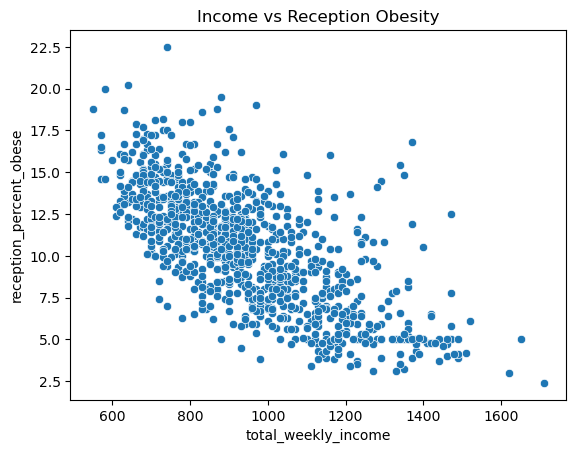

In [354]:
# let's visualise our relationships:
# Scatter plot for total_weekly_income vs reception_percent_obese
sns.scatterplot(x='total_weekly_income', y='reception_percent_obese', data=merged_data)
plt.title('Income vs Reception Obesity')
plt.show()


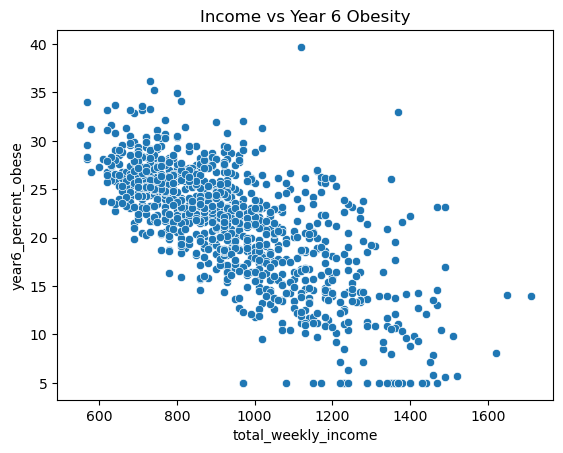

In [355]:
# Scatter plot for total_weekly_income vs year6_percent_obese
sns.scatterplot(x='total_weekly_income', y='year6_percent_obese', data=merged_data)
plt.title('Income vs Year 6 Obesity')
plt.show()

In [ ]:
# These scatter plots hint on linear relationship between obesity rates vs income. 
#to further analyse this relationship, let's analyse the index o multiple deprivation affecting children and obesity data and run a regression analysis on it.

In [356]:
imd_data = pd.read_csv('IMD_london_2015.csv')
imd_data.head()

,LSOA code (2011),LSOA name (2011),Local Authority District code (2013),Local Authority District name (2013),Income Deprivation Affecting Children Index (IDACI) Score (rate),Income Deprivation Affecting Children Index (IDACI) Rank (where 1 is most deprived),Income Deprivation Affecting Children Index (IDACI) Decile (where 1 is most deprived 10% of LSOAs),Income Deprivation Affecting Older People (IDAOPI) Score (rate),Income Deprivation Affecting Older People (IDAOPI) Rank (where 1 is most deprived),Income Deprivation Affecting Older People (IDAOPI) Decile (where 1 is most deprived 10% of LSOAs)
0,E01000001,City of London 001A,E09000001,City of London,0.0,32817,10,0.0,32770,10
1,E01000002,City of London 001B,E09000001,City of London,0.0,32832,10,0.0,32415,10
2,E01000003,City of London 001C,E09000001,City of London,0.2,15804,5,0.2,15417,5
3,E01000005,City of London 001E,E09000001,City of London,0.3,7874,3,0.4,2525,1
4,E01032739,City of London 001F,E09000001,City of London,0.1,28395,9,0.0,32836,10


In [357]:
lookup_table = pd.read_csv('lsoa_msoa_lookup.csv')
lookup_table.head()

,OA11CD,LAD15CD,LAD15NM,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LEP14CD1,LEP14NM1,LEP14CD2,LEP14NM2,ObjectId
0,E00000231,E09000002,Barking and Dagenham,E01000043,Barking and Dagenham 019B,E02000020,Barking and Dagenham 019,E37000023,London,NaN,NaN,1
1,E00000292,E09000002,Barking and Dagenham,E01000054,Barking and Dagenham 018A,E02000019,Barking and Dagenham 018,E37000023,London,NaN,NaN,2
2,E00000064,E09000002,Barking and Dagenham,E01000011,Barking and Dagenham 016C,E02000017,Barking and Dagenham 016,E37000023,London,NaN,NaN,3
3,E00000310,E09000002,Barking and Dagenham,E01000064,Barking and Dagenham 006E,E02000007,Barking and Dagenham 006,E37000023,London,NaN,NaN,4
4,E00000001,E09000001,City of London,E01000001,City of London 001A,E02000001,City of London 001,E37000023,London,NaN,NaN,5


In [358]:
# let's add the column with MSOA codes to the IMD data:

imd_data['LSOA code (2011)'] = imd_data['LSOA code (2011)'].str.strip()
lookup_table['LSOA11CD'] = lookup_table['LSOA11CD'].str.strip()

# Merge the IMD data with the lookup table on the LSOA code
imd_msoa_data = pd.merge(imd_data, lookup_table[['LSOA11CD', 'MSOA11CD']], left_on='LSOA code (2011)', right_on='LSOA11CD', how='left')

# Drop the duplicate LSOA column from the lookup table (optional)
imd_msoa_data.drop(columns=['LSOA11CD'], inplace=True)

# Save the merged dataset to a new CSV file (optional)
imd_msoa_data.to_csv('IMD_with_MSOA.csv', index=False)

# Display the first few rows of the merged dataset
print(imd_msoa_data.head())

  LSOA code (2011)     LSOA name (2011) Local Authority District code (2013)  \
0        E01000001  City of London 001A                            E09000001   
1        E01000001  City of London 001A                            E09000001   
2        E01000001  City of London 001A                            E09000001   
3        E01000001  City of London 001A                            E09000001   
4        E01000001  City of London 001A                            E09000001   

  Local Authority District name (2013)  \
0                       City of London   
1                       City of London   
2                       City of London   
3                       City of London   
4                       City of London   

   Income Deprivation Affecting Children Index (IDACI) Score (rate)  \
0                                                0.0                  
1                                                0.0                  
2                                                0.0 

In [385]:
# Since each MSOA includes multiple LSOA's we need to use the aggregated the mean score to continue further. to do this:

imd_msoa_data = pd.read_csv('IMD_with_MSOA.csv') 
agg_imd = imd_msoa_data.groupby('MSOA11CD').agg({
    'Income Deprivation Affecting Children Index (IDACI) Score (rate)': 'mean'
}).round(1).reset_index()

# Rename columns for clarity
agg_imd.rename(columns={
    'Income Deprivation Affecting Children Index (IDACI) Score (rate)': 'imd_children_score'
}, inplace=True)

# Save the aggregated dataset to a new file (optional)
agg_imd.to_csv('MSOA_IMD_Aggregated.csv', index=False)

# Display first few rows of aggregated data
print(agg_imd.head())

    MSOA11CD  imd_children_score
0  E02000001                 0.1
1  E02000002                 0.3
2  E02000003                 0.2
3  E02000004                 0.2
4  E02000005                 0.3


In [386]:
# we are going to use the Index Score (rate) for regression analysis because it is a continuous variable, 
# which is more appropriate for linear regression models.
# let's elect relevant columns from IMD data
agg_imd = agg_imd[['MSOA11CD', 'imd_children_score']]
agg_imd.rename(columns={
    'MSOA11CD': 'msoa',
    'Income Deprivation Affecting Children Index (IDACI) Score (rate)': 'idaci_score'
}, inplace=True)

# Merge datasets on MSOA code
final_data = pd.merge(merged_data, agg_imd, on='msoa')

# Save the merged dataset to a new CSV file (optional)
final_data.to_csv('IMD_INCOME_OBESITY_MSOA.csv', index=False)

# Display the first few rows of the merged dataset
print(final_data.head())

        msoa area_name_x  total_weekly_income  confidence_interval geog_level  \
0  E02000166  Camden 001               1070.0                280.0       MSOA   
1  E02000167  Camden 002               1440.0                500.0       MSOA   
2  E02000168  Camden 003               1200.0                310.0       MSOA   
3  E02000169  Camden 004               1380.0                370.0       MSOA   
4  E02000170  Camden 005               1230.0                320.0       MSOA   

  area_name_y  reception_count  reception_percent_obese  year6_count  \
0  Camden 001              179                      5.6          164   
1  Camden 002               95                      5.0           53   
2  Camden 003              238                      5.5          171   
3  Camden 004               88                      5.0           42   
4  Camden 005              144                      5.0          103   

   year6_percent_obese  imd_children_score  
0                 15.2             

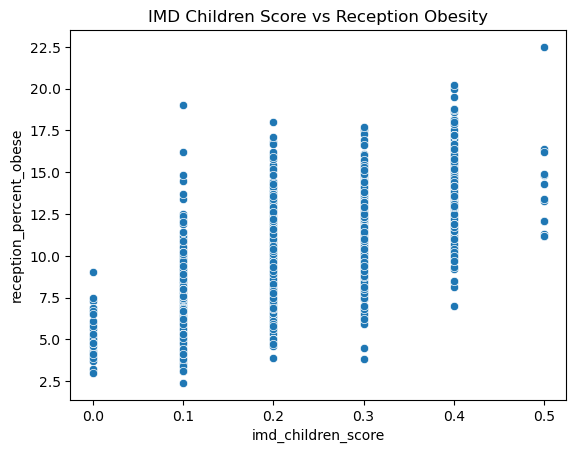

In [405]:
# let's visualise our relationships:
# Scatter plot for total_weekly_income vs reception_percent_obese
sns.scatterplot(x='imd_children_score', y='reception_percent_obese', data=final_data)
plt.title('IMD Children Score vs Reception Obesity')
plt.show()

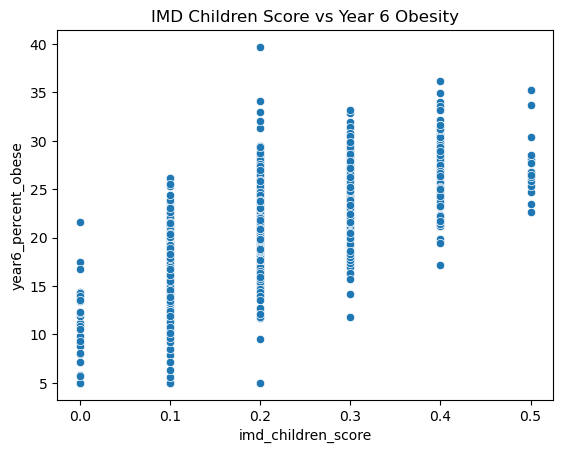

In [407]:
# let's visualise our relationships:
# Scatter plot for total_weekly_income vs reception_percent_obese
sns.scatterplot(x='imd_children_score', y= 'year6_percent_obese', data=final_data)
plt.title('IMD Children Score vs Year 6 Obesity')
plt.show()

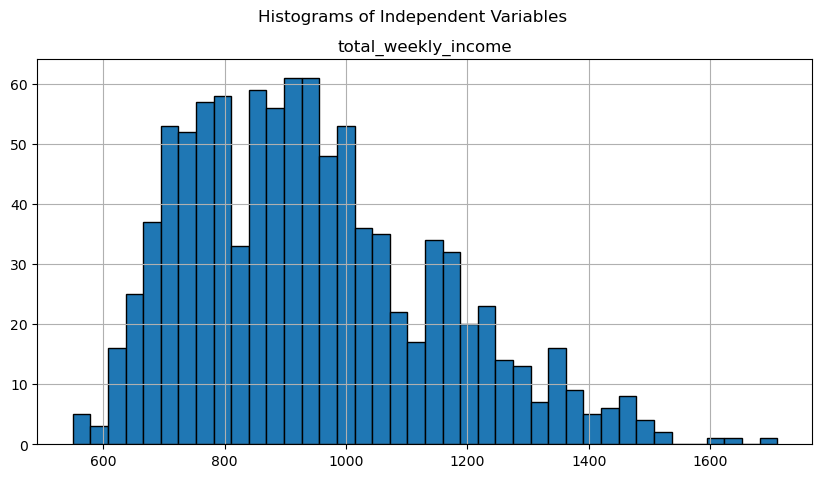

In [402]:
# Plot histograms for independent variables
final_data[['total_weekly_income']].hist(bins=40, edgecolor='black', figsize=(10, 5))
plt.suptitle('Histograms of Independent Variables')
plt.show()

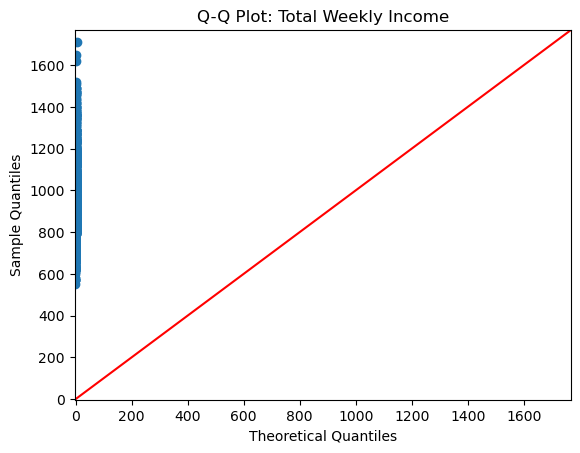

In [403]:
# Q-Q plot for IMD Children Score
sm.qqplot(final_data['total_weekly_income'], line='45')
plt.title('Q-Q Plot: Total Weekly Income')
plt.show()

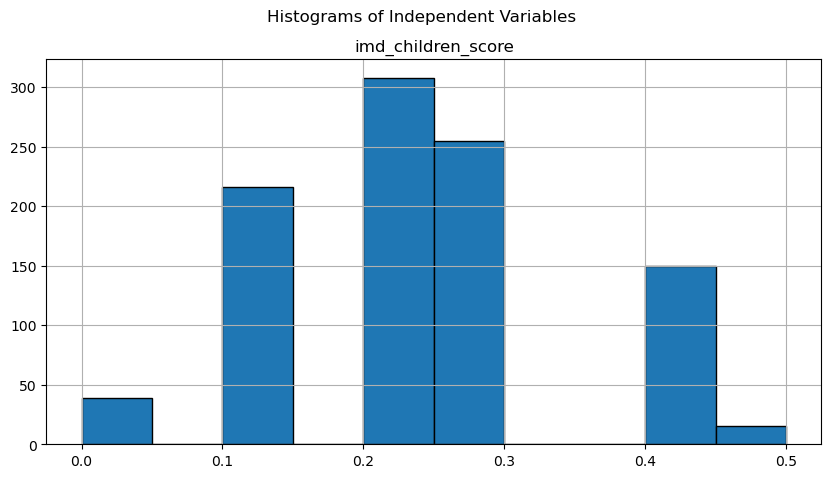

In [387]:
# Plot histograms for independent variables
final_data[['imd_children_score']].hist(bins=10, edgecolor='black', figsize=(10, 5))
plt.suptitle('Histograms of Independent Variables')
plt.show()

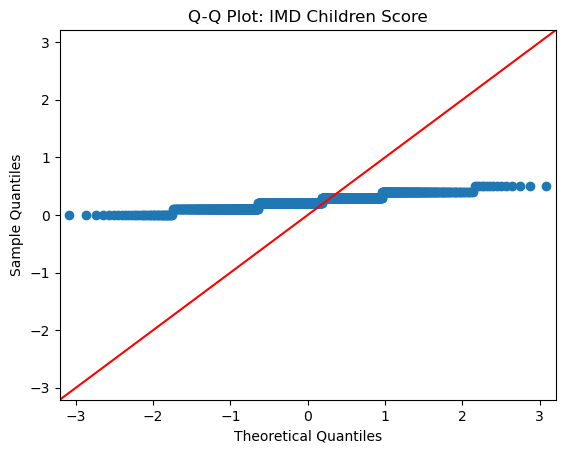

In [390]:
# Q-Q plot for IMD Children Score
sm.qqplot(final_data['imd_children_score'], line='45')
plt.title('Q-Q Plot: IMD Children Score')
plt.show()

In [392]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for IMD Children Score
stat, p = shapiro(final_data['imd_children_score'])
print(f"IMD Children Score: Statistic={stat}, p-value={p}")

# Perform Shapiro-Wilk test for Total Weekly Income
stat, p = shapiro(final_data['total_weekly_income'])
print(f"Total Weekly Income: Statistic={stat}, p-value={p}")

IMD Children Score: Statistic=0.9240764124828891, p-value=7.467103730313525e-22
Total Weekly Income: Statistic=0.9642374802228322, p-value=8.442472056114685e-15


In [394]:
from scipy.stats import kstest

# Perform Kolmogorov-Smirnov test for IMD Children Score
stat, p = kstest(final_data['imd_children_score'], 'norm', args=(final_data['imd_children_score'].mean(), final_data['imd_children_score'].std()))
print(f"IMD Children Score: Statistic={stat}, p-value={p}")

# Perform Kolmogorov-Smirnov test for Total Weekly Income
stat, p = kstest(final_data['total_weekly_income'], 'norm', args=(final_data['total_weekly_income'].mean(), final_data['total_weekly_income'].std()))
print(f"Total Weekly Income: Statistic={stat}, p-value={p}")

IMD Children Score: Statistic=0.18072537746572126, p-value=1.449774665043626e-28
Total Weekly Income: Statistic=0.07552534187782933, p-value=2.5337644519779403e-05


In [398]:
# Select relevant columns for correlation analysis
columns_for_correlation = ['imd_children_score', 'reception_percent_obese', 'year6_percent_obese', 'total_weekly_income']

# Drop rows with missing values in these columns
data_for_correlation = final_data[columns_for_correlation].dropna()

# Ensure all columns are numeric
data_for_correlation = data_for_correlation.astype(float)

# Compute the correlation matrix
correlation_matrix = data_for_correlation.corr()

# Display the correlation matrix
print(correlation_matrix)

                         imd_children_score  reception_percent_obese  \
imd_children_score                 1.000000                 0.661403   
reception_percent_obese            0.661403                 1.000000   
year6_percent_obese                0.704892                 0.674342   
total_weekly_income               -0.762374                -0.694859   

                         year6_percent_obese  total_weekly_income  
imd_children_score                  0.704892            -0.762374  
reception_percent_obese             0.674342            -0.694859  
year6_percent_obese                 1.000000            -0.711772  
total_weekly_income                -0.711772             1.000000  


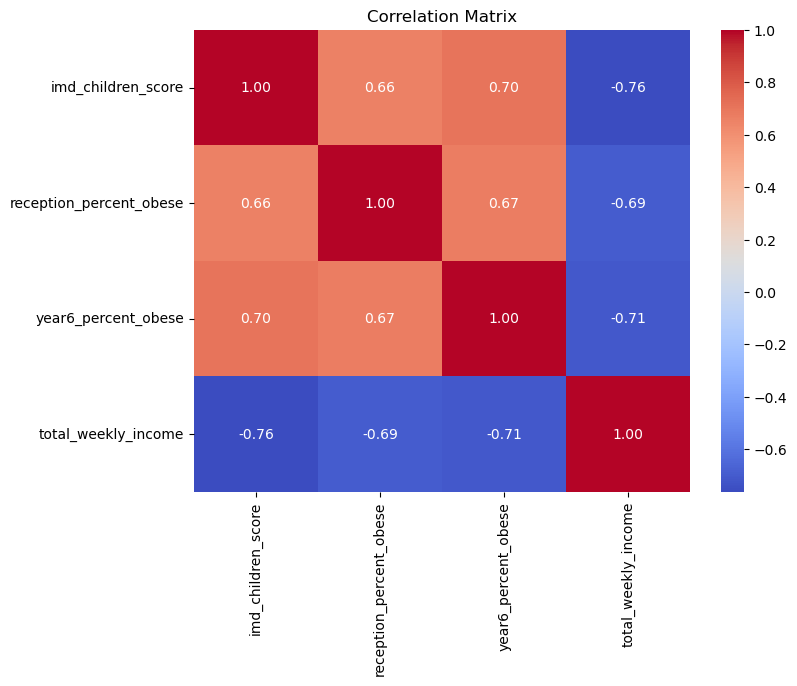

In [399]:
# Create a heatmap to visualize correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [361]:
# Let's check if we have any missing values before starting our regression analysis
print(final_data[['imd_children_score', 'reception_percent_obese', 'year6_percent_obese']].isnull().sum())

imd_children_score         0
reception_percent_obese    0
year6_percent_obese        0
dtype: int64


In [362]:
# Since there are no missing values, and our values are numeric, we can start with our analysis

# 1.Regression for the reception year children

import statsmodels.api as sm

# Define dependent (Y) and independent (X) variables
X_reception = final_data['imd_children_score']
y_reception = final_data['reception_percent_obese']

# Add a constant to the independent variable (for intercept)
X_reception = sm.add_constant(X_reception)

# Fit the regression model
model_reception = sm.OLS(y_reception, X_reception).fit()

# Print the summary of the regression results
print(model_reception.summary())

                               OLS Regression Results                              
Dep. Variable:     reception_percent_obese   R-squared:                       0.437
Model:                                 OLS   Adj. R-squared:                  0.437
Method:                      Least Squares   F-statistic:                     762.9
Date:                     Tue, 21 Jan 2025   Prob (F-statistic):          1.09e-124
Time:                             11:27:32   Log-Likelihood:                -2325.9
No. Observations:                      983   AIC:                             4656.
Df Residuals:                          981   BIC:                             4666.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [363]:
# 2.Regression for the year 6 children

# Define dependent (Y) and independent (X) variables
X_year6 = final_data['imd_children_score']
y_year6 = final_data['year6_percent_obese']

# Add a constant to the independent variable (for intercept)
X_year6 = sm.add_constant(X_year6)

# Fit the regression model
model_year6 = sm.OLS(y_year6, X_year6).fit()

# Print the summary of the regression results
print(model_year6.summary())

                             OLS Regression Results                            
Dep. Variable:     year6_percent_obese   R-squared:                       0.497
Model:                             OLS   Adj. R-squared:                  0.496
Method:                  Least Squares   F-statistic:                     968.8
Date:                 Tue, 21 Jan 2025   Prob (F-statistic):          1.70e-148
Time:                         11:27:35   Log-Likelihood:                -2816.3
No. Observations:                  983   AIC:                             5637.
Df Residuals:                      981   BIC:                             5646.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 12.8

In [286]:
# Let's plot the results:

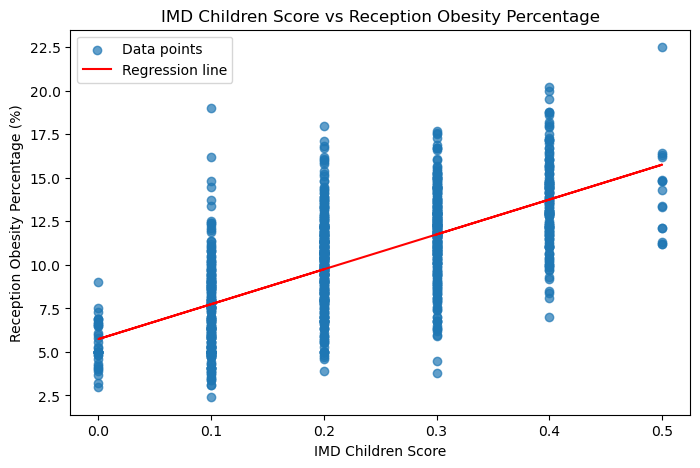

In [364]:
# 1. OLS Regression Results for the Reception year children

import matplotlib.pyplot as plt

# Scatter plot with regression line for Reception obesity rates
plt.figure(figsize=(8, 5))
plt.scatter(final_data['imd_children_score'], final_data['reception_percent_obese'], alpha=0.7, label='Data points')
plt.plot(final_data['imd_children_score'], model_reception.predict(X_reception), color='red', label='Regression line')
plt.xlabel('IMD Children Score')
plt.ylabel('Reception Obesity Percentage (%)')
plt.title('IMD Children Score vs Reception Obesity Percentage')
plt.legend()
plt.show()

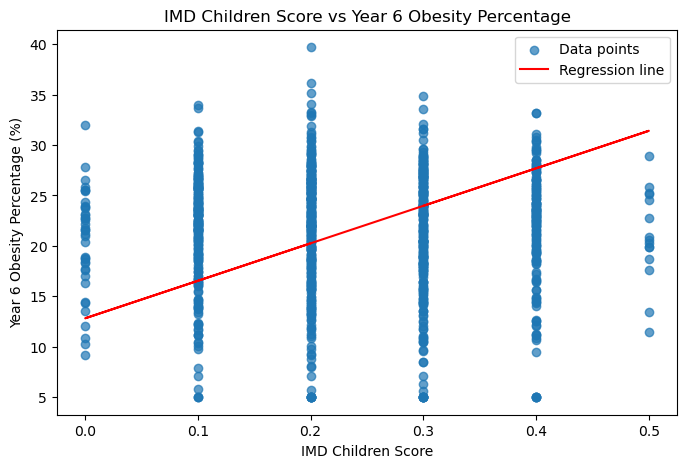

In [404]:
# 2. OLS Regression Results for the year 6 children

# Scatter plot with regression line for Year 6 obesity rates
plt.figure(figsize=(8, 5))
plt.scatter(final_data['imd_children_score'], data['year6_percent_obese'], alpha=0.7, label='Data points')
plt.plot(final_data['imd_children_score'], model_year6.predict(X_year6), color='red', label='Regression line')
plt.xlabel('IMD Children Score')
plt.ylabel('Year 6 Obesity Percentage (%)')
plt.title('IMD Children Score vs Year 6 Obesity Percentage')
plt.legend()
plt.show()

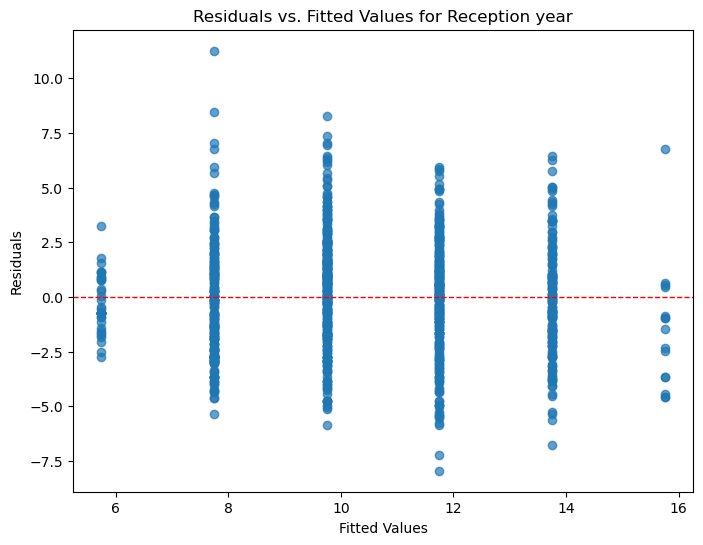

In [367]:
fitted_values = model_reception.fittedvalues  # Predicted values
residuals = model_reception.resid             # Residuals

# Create Residuals vs. Fitted Plot
plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)  # Add horizontal line at 0
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values for Reception year')
plt.show()

In [293]:
influence = model_reception.get_influence()
cooks_d = influence.cooks_distance[0]

# Threshold for high influence points
n = len(data)
threshold = 4 / n

# Identify high influence points
high_influence_points = data[cooks_d > threshold]
print(high_influence_points)

    geog_level       msoa                   area_name  reception_count  \
18        MSOA  E02000020    Barking and Dagenham 019              486   
25        MSOA  E02000026                  Barnet 003              210   
30        MSOA  E02000031                  Barnet 008              197   
44        MSOA  E02000045                  Barnet 022              358   
58        MSOA  E02000059                  Barnet 036              300   
71        MSOA  E02000072                  Bexley 008              669   
83        MSOA  E02000085                  Bexley 021              280   
119       MSOA  E02000120                   Brent 028              255   
137       MSOA  E02000139                 Bromley 013              274   
147       MSOA  E02000150                 Bromley 024              252   
149       MSOA  E02000152                 Bromley 026              260   
175       MSOA  E02000176                  Camden 011               44   
279       MSOA  E02000280             

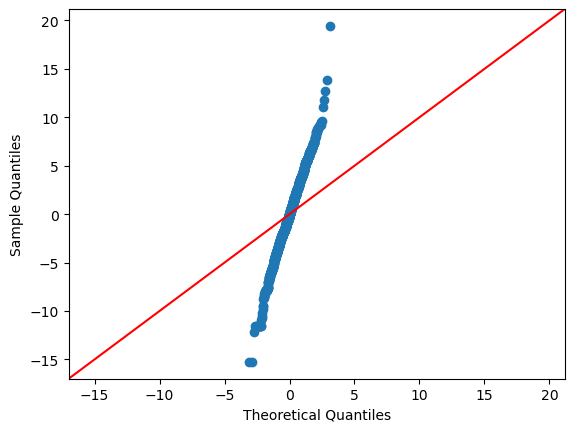

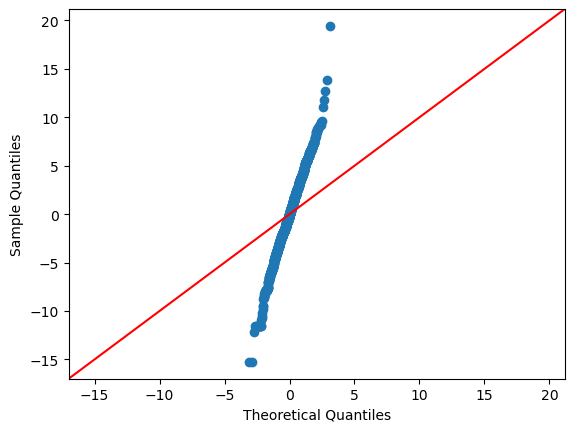

In [369]:
import statsmodels.api as sm
sm.qqplot(residuals, line='45')

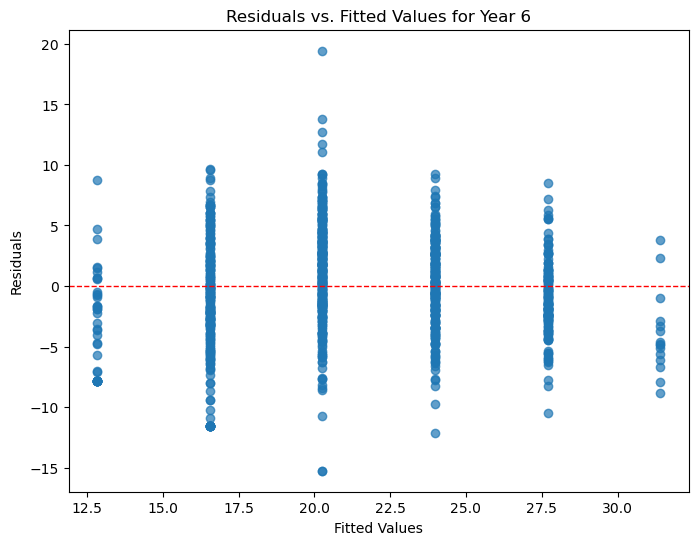

In [368]:
fitted_values = model_year6.fittedvalues  # Predicted values
residuals = model_year6.resid             # Residuals

# Create Residuals vs. Fitted Plot
plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)  # Add horizontal line at 0
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values for Year 6')
plt.show()

In [296]:
influence = model_year6.get_influence()
cooks_d = influence.cooks_distance[0]

# Threshold for high influence points
n = len(data)
threshold = 4 / n

# Identify high influence points
high_influence_points = data[cooks_d > threshold]
print(high_influence_points)

    geog_level       msoa                   area_name  reception_count  \
1         MSOA  E02000002    Barking and Dagenham 001              359   
3         MSOA  E02000004    Barking and Dagenham 003              208   
7         MSOA  E02000009    Barking and Dagenham 008              502   
10        MSOA  E02000012    Barking and Dagenham 011              433   
20        MSOA  E02000022    Barking and Dagenham 021              606   
25        MSOA  E02000026                  Barnet 003              210   
46        MSOA  E02000047                  Barnet 024              451   
78        MSOA  E02000080                  Bexley 016              311   
80        MSOA  E02000082                  Bexley 018              285   
90        MSOA  E02000092                  Bexley 028              264   
94        MSOA  E02000095                   Brent 003              333   
101       MSOA  E02000102                   Brent 010              352   
135       MSOA  E02000137             

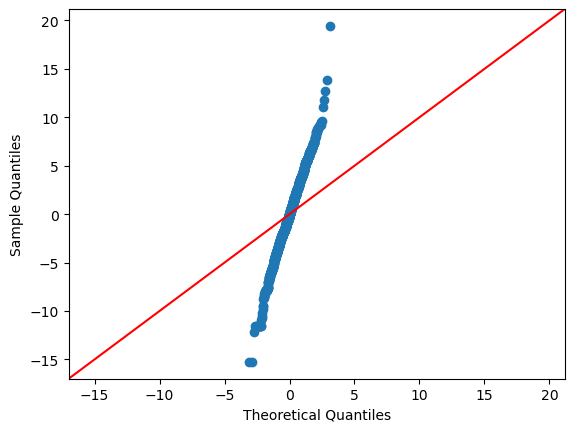

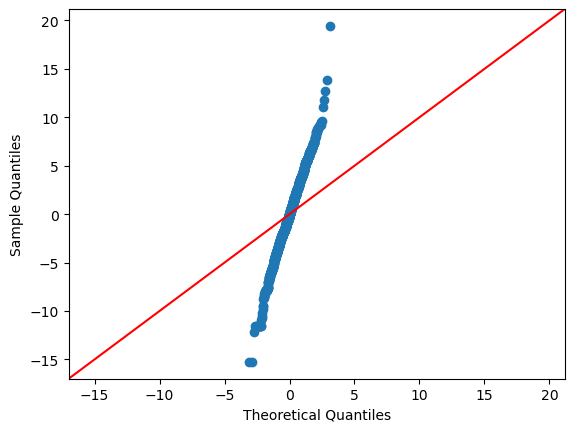

In [297]:
import statsmodels.api as sm
sm.qqplot(residuals, line='45')

In [ ]:
# Part 2

In [299]:
# Now let's check if there are any spatial patterns

import geopandas as gpd


# Load the MSOA boundaries shapefile
msoa_boundaries = gpd.read_file('MSOA_Dec_2011_Boundaries_Super_Generalised_Clipped_BSC_EW_V3_2022_-6859460489122695720/MSOA_2011_EW_BSC_V3.shp')  # Replace with your shapefile path

# Merge the datasets on the MSOA code
spatial_data = msoa_boundaries.merge(final_data, left_on='MSOA11CD', right_on='msoa')

# Display the first few rows of the merged GeoDataFrame
print(spatial_data.head())

    MSOA11CD                  MSOA11NM                 MSOA11NMW   BNG_E  \
0  E02000001        City of London 001        City of London 001  532378   
1  E02000002  Barking and Dagenham 001  Barking and Dagenham 001  548267   
2  E02000003  Barking and Dagenham 002  Barking and Dagenham 002  548259   
3  E02000004  Barking and Dagenham 003  Barking and Dagenham 003  551004   
4  E02000005  Barking and Dagenham 004  Barking and Dagenham 004  548733   

    BNG_N      LONG      LAT                              GlobalID  \
0  181354 -0.093570  51.5156  a9f03568-7a0a-42b8-a23e-1271f76431e1   
1  189693  0.138759  51.5866  f0ca54f0-1a1e-4c72-8fcb-85e21be6de79   
2  188522  0.138150  51.5761  3772a2ec-b052-4000-b62b-2c85ac401a7f   
3  186418  0.176830  51.5564  3388e1f6-e578-4907-b271-168756f05856   
4  186827  0.144269  51.5607  1af0aed4-60d0-4fd6-b326-4b868968c12f   

                                            geometry       msoa  \
0  POLYGON ((532946.065 181894.827, 533410.692 18...  E

<Figure size 1200x800 with 0 Axes>

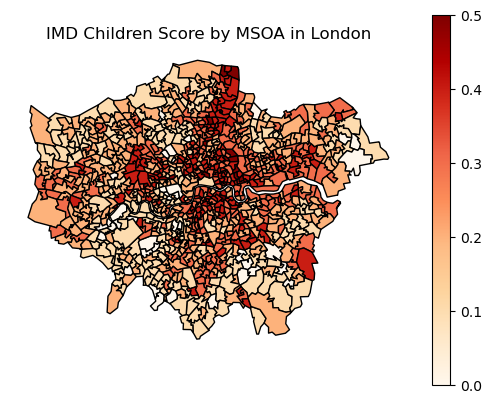

In [370]:
import matplotlib.pyplot as plt

# Plot IMD Children Score
plt.figure(figsize=(12, 8))
spatial_data.plot(column='imd_children_score', cmap='OrRd', legend=True, edgecolor='black')
plt.title('IMD Children Score by MSOA in London', fontsize=12)
plt.axis('off')
plt.show()

<Figure size 1200x800 with 0 Axes>

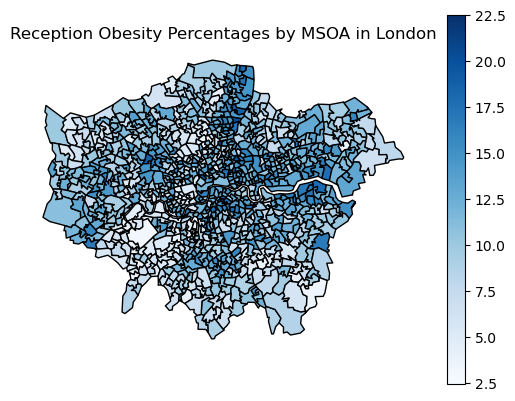

In [371]:
# Plot Reception Obesity Rates
plt.figure(figsize=(12, 8))
spatial_data.plot(column='reception_percent_obese', cmap='Blues', legend=True, edgecolor='black')
plt.title('Reception Obesity Percentages by MSOA in London', fontsize=12)
plt.axis('off')
plt.show()

<Figure size 1200x800 with 0 Axes>

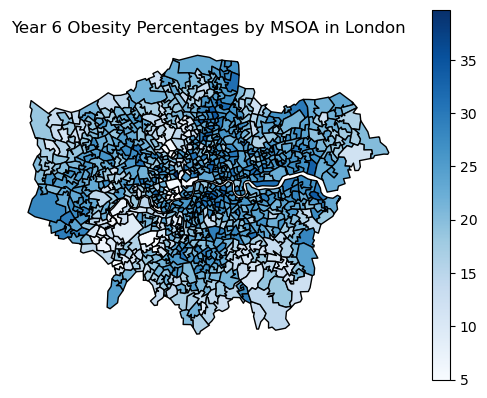

In [375]:
# Plot year 6 Obesity Rates
plt.figure(figsize=(12, 8))
spatial_data.plot(column='year6_percent_obese', cmap='Blues', legend=True, edgecolor='black')
plt.title('Year 6 Obesity Percentages by MSOA in London', fontsize=12)
plt.axis('off')
plt.show()

In [313]:
!pip install --upgrade pysal

In [316]:
from esda.moran import Moran
from libpysal.weights import Queen

# Create a spatial weights matrix (Queen contiguity)
w = Queen.from_dataframe(spatial_data)
w.transform = 'r'

# Calculate Moran's I for reception_percent_obese
moran = Moran(spatial_data['reception_percent_obese'], w)

# Print Moran's I results
print(f"Moran's I: {moran.I}, p-value: {moran.p_sim}")

Moran's I: 0.4586017539669263, p-value: 0.001


/tmp/ipykernel_5162/4118609968.py:5: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(spatial_data)


In [318]:
from esda.moran import Moran
from libpysal.weights import Queen

# Create a spatial weights matrix (Queen contiguity)
w = Queen.from_dataframe(spatial_data)
w.transform = 'r'

# Calculate Moran's I for year6_percent_obese
moran = Moran(spatial_data['year6_percent_obese'], w)

# Print Moran's I results
print(f"Moran's I: {moran.I}, p-value: {moran.p_sim}")

Moran's I: 0.5014758881268925, p-value: 0.001


/tmp/ipykernel_5162/1106544166.py:5: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(spatial_data)


<Figure size 1200x800 with 0 Axes>

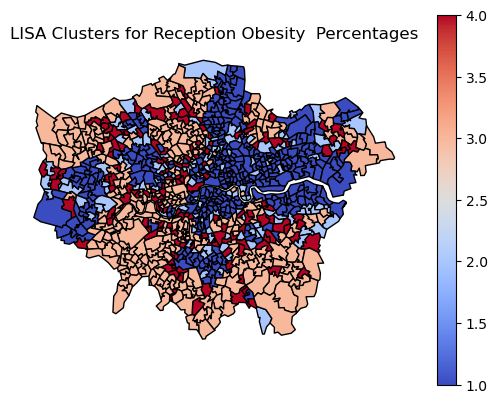

In [374]:
from esda.moran import Moran_Local
from libpysal.weights import Queen

# Perform Local Moran's I analysis for reception year children
lisa = Moran_Local(spatial_data['reception_percent_obese'], w)

# Add LISA cluster labels to GeoDataFrame
spatial_data['lisa_cluster'] = lisa.q

# Plot LISA clusters
plt.figure(figsize=(12, 8))
spatial_data.plot(column='lisa_cluster', cmap='coolwarm', legend=True, edgecolor='black')
plt.title('LISA Clusters for Reception Obesity  Percentages', fontsize=12)
plt.axis('off')
plt.show()

<Figure size 1200x800 with 0 Axes>

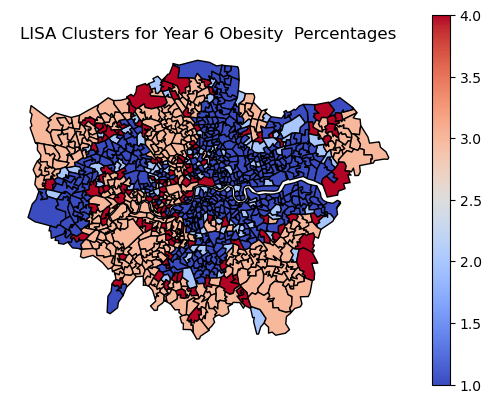

In [376]:
from esda.moran import Moran_Local
from libpysal.weights import Queen

# Perform Local Moran's I analysis for year 6 children
lisa = Moran_Local(spatial_data['year6_percent_obese'], w)

# Add LISA cluster labels to GeoDataFrame
spatial_data['lisa_cluster'] = lisa.q

# Plot LISA clusters
plt.figure(figsize=(12, 8))
spatial_data.plot(column='lisa_cluster', cmap='coolwarm', legend=True, edgecolor='black')
plt.title('LISA Clusters for Year 6 Obesity  Percentages', fontsize=12)
plt.axis('off')
plt.show()

In [409]:
import geopandas as gpd
import pandas as pd
from mgwr.gwr import GWR
from mgwr.sel_bw import Sel_BW
from libpysal.weights import Queen

In [411]:
# Standardize variables
spatial_data['imd_children_score_std'] = (spatial_data['imd_children_score'] - spatial_data['imd_children_score'].mean()) / spatial_data['imd_children_score'].std()
spatial_data['reception_percent_obese_std'] = (spatial_data['reception_percent_obese'] - spatial_data['reception_percent_obese'].mean()) / spatial_data['reception_percent_obese'].std()

In [412]:
# Extract coordinates from geometry centroids
coords = list(zip(spatial_data.geometry.centroid.x, spatial_data.geometry.centroid.y))

In [413]:
# Define dependent (Y) and independent (X) variables
Y = spatial_data[['reception_percent_obese_std']].values  # Dependent variable
X = spatial_data[['imd_children_score_std']].values  # Independent variable

# Select bandwidth for GWR
selector = Sel_BW(coords, Y, X)
bandwidth = selector.search()
print(f"Optimal Bandwidth: {bandwidth}")

Optimal Bandwidth: 62.0


In [414]:
# Fit the GWR model
gwr_model = GWR(coords, Y, X, bandwidth)
gwr_results = gwr_model.fit()

# Print summary of results
print(gwr_results.summary())

Model type                                                         Gaussian
Number of observations:                                                 983
Number of covariates:                                                     2

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                            552.420
Log-likelihood:                                                   -1111.565
AIC:                                                               2227.130
AICc:                                                              2229.154
BIC:                                                              -6207.268
R2:                                                                   0.437
Adj. R2:                                                              0.437

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

<Figure size 1200x800 with 0 Axes>

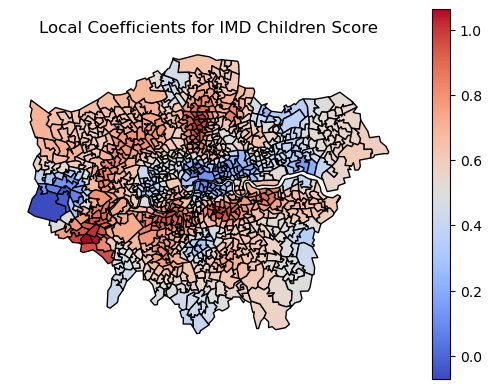

In [415]:
# Add local coefficients to GeoDataFrame for visualization
spatial_data['local_coef'] = gwr_results.params[:, 1]  # Coefficient for imd_children_score

# Plot local coefficients on a map
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
spatial_data.plot(column='local_coef', cmap='coolwarm', legend=True, edgecolor='black')
plt.title('Local Coefficients for IMD Children Score')
plt.axis('off')
plt.show()